<a href="https://colab.research.google.com/github/ds-joy/ML-Practice/blob/master/deep_learning_with_python/chap_05/dogcat_v1_0/dogcatv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data into google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#creating the path where to load the data
% cd /content/drive/My Drive/Colab Notebooks/dogcatv1

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [2]:
!ls

sample_data


In [ ]:
!unzip test1.zip
!unzip train.zip

#Creating test and train directories

In [18]:
import os, shutil
original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/dogcatv1/'
base_dir = '/content/drive/My Drive/Colab Notebooks/dogcatv1/data'

###Test, validation and train directories

In [19]:
#train directories
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

#validation directories
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

#test directories
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

###Separating cats and dogs directories

In [20]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [21]:
original_dataset_dir = os.path.join(original_dataset_dir, 'train')
from tqdm import tqdm

###Separating cat photos

In [17]:
# 1000 training photos
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500 validation photos
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 500 testing photos
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

100%|██████████| 500/500 [03:00<00:00,  2.77it/s]


###Separating dog photos

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

100%|██████████| 500/500 [02:57<00:00,  2.81it/s]


#Building The network

###The model

In [23]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###Configuring the model for training

In [25]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


#Data preprocessing

###Steps in preprocessing the data


> 1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as we know, neural networks prefer to deal with small input values).







In [27]:
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(150, 150), # Resizes all images to 150 × 150
        batch_size=20,
        class_mode='binary') 
        # to use binary_crossentropy loss, we need binarylabels.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#Model fitting

###  Fitting the model using a batch generator

In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6862 - acc: 0.5360 - val_loss: 0.7073 - val_acc: 0.5290
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6524 - acc: 0.6160 - val_loss: 0.6448 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.5933 - acc: 0.6840 - val_loss: 0.6148 - val_acc: 0.6670
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.5566 - acc: 0.7035 - val_loss: 0.6112 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 103s 1s/step - loss: 0.5377 - acc: 0.7215 - val_loss: 0.5809 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.5112 - acc: 0.7400 - val_loss: 0.5759 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 102s 1s/step - loss: 0.4900 - acc: 0.7600 - val_loss: 0.5681 - val_acc: 

###Saving the model

In [30]:
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training

> These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.



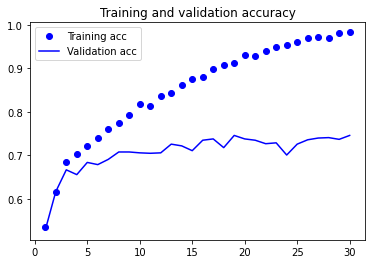

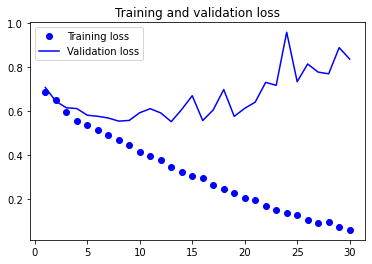

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()